### Eugene
C_node data from: https://datadryad.org/resource/doi:10.5061/dryad.p68f8

This is quite messy, I just played around a bit.


In [73]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')


a = h5py.File('C_nodes.hdf5', 'r')
a.keys()

#dset = f['C_nodes.hdf5']

# this prints every dataset from the group g/1000:
# def print_attrs(name, obj):
    #print(name)
    #for key, val in obj.attrs.items():
        #print("    %s: %s" % (key, val))

# a.visititems(print_attrs)

KeysView(<HDF5 file "C_nodes.hdf5" (mode r)>)

In [74]:
# get the names of the datasets from a group (where a group is a frame)
frame_1 = a.get('/1000')
print(frame_1.items())

ItemsViewHDF5(<HDF5 group "/1000" (10 members)>)


In [75]:
# convert it to an array
array_1 = np.array(frame_1)
print(array_1.shape, '\n')
print(array_1)

# These are the datasets contained in the first frame: 

(10,) 

['V' 'hdg' 'hdg_rate' 'tid' 'vx' 'vy' 'vz' 'x' 'y' 'z']


In [76]:
# get one dataset, V - flight speed, from the first frame
V = frame_1.get('V')
print(V)

<HDF5 dataset "V": shape (1560,), type "<f4">


In [77]:
# get another dataset, x - x axis position, from the same frame
x = frame_1.get('x')
print(x)

<HDF5 dataset "x": shape (1560,), type "<f4">


In [78]:
# print the first 10 position values
x[0:10]

array([ -3.5304,   5.0025, -22.599 ,  -2.5245, -15.571 , -22.552 ,
         4.5935,   7.8901, -25.51  , -26.003 ], dtype=float32)

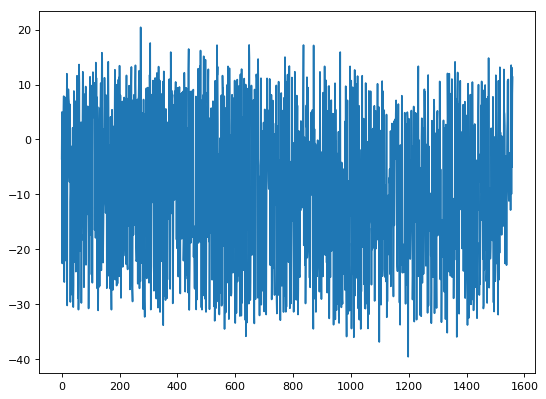

In [80]:
# plot the x-values
x_values = np.array(x)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x)

In [81]:
# get the y and z values
y = frame_1.get('y')
z = frame_1.get('z')

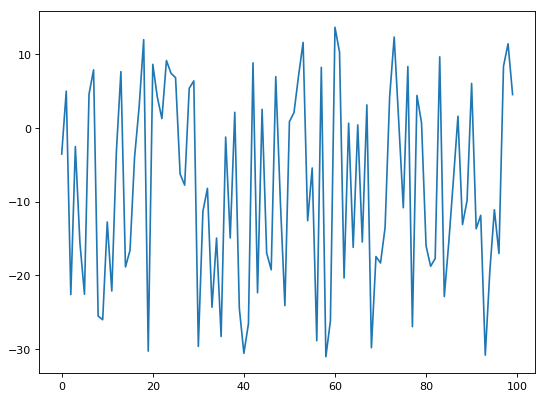

In [86]:
# lets plot a small set of the position data: 
xdir = np.asarray(a["1000/x"])
ydir = np.asarray(a["1000/y"])
zdir = np.asarray(a["1000/z"])

x1, x2, x3 = np.split(xdir, [100, 10])
y1, y2, y3 = np.split(ydir, [100, 10])
z1, z2, z3 = np.split(zdir, [100, 10])

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x1)

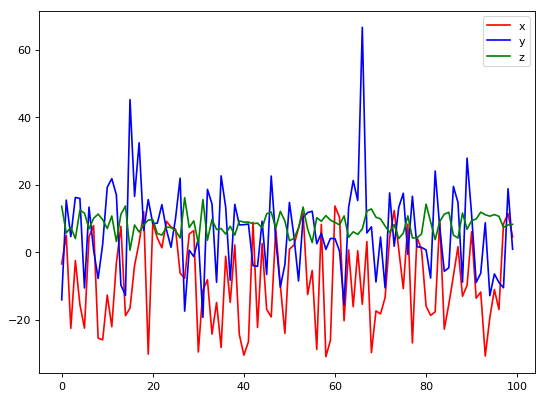

In [115]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x1, 'r', label='x')
plt.plot(y1, 'b', label='y')
plt.plot(z1, 'g', label='z')

plt.legend()

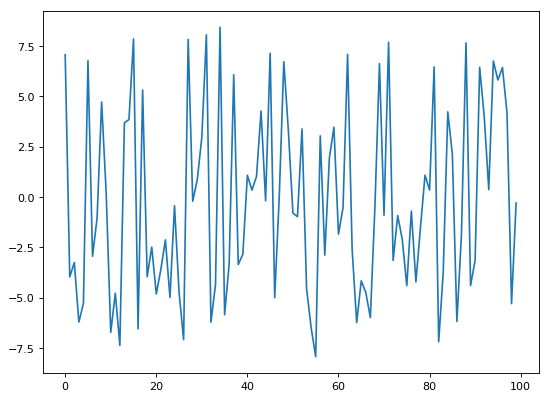

In [105]:
vx = np.asarray(a["1000/vx"])
vx1, vx2, vx3 = np.split(vx, [100, 10]) 
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(vx1)
plt.show()

ValueError: Argument Z must be 2-dimensional.

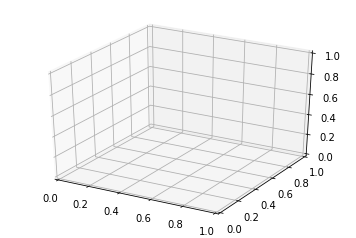

In [124]:
fig = plt.figure()
ax = plt.axes(projection='3d')